In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
sns.set(color_codes = True)
import warnings
warnings.filterwarnings('ignore')

warnings.simplefilter(action = 'ignore' , category='FutureWarning')

In [2]:
df=pd.read_csv('C:/Users/sajid/Downloads/Compressed/heart.csv')

In [3]:
df.shape

(918, 12)

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
sex = df['Sex'].value_counts().reset_index()

In [11]:
sex

,index,Sex
0,M,725
1,F,193


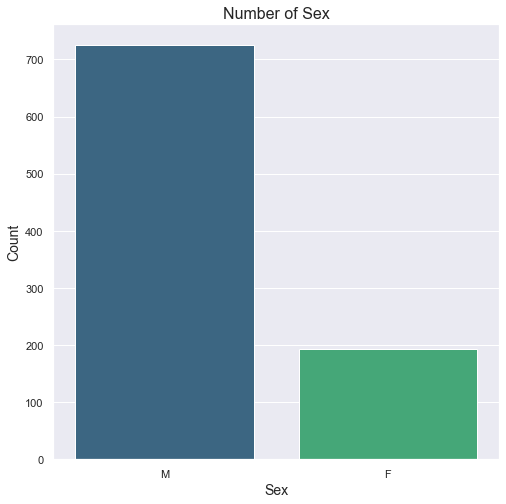

In [12]:
plt.figure(figsize=(8, 8))
sns.barplot(x='index', y='Sex', data=sex, palette='viridis')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of Sex', fontsize=16)
plt.show()

In [13]:
ChestPainType = df['ChestPainType'].value_counts().reset_index()
ChestPainType

,index,ChestPainType
0,ASY,496
1,NAP,203
2,ATA,173
3,TA,46


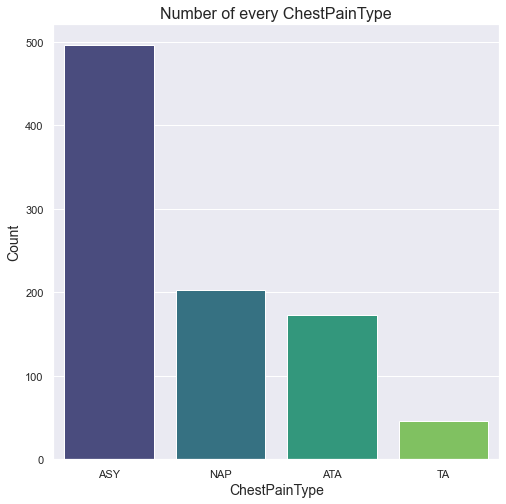

In [14]:
plt.figure(figsize=(8, 8))
sns.barplot(x='index', y='ChestPainType', data=ChestPainType, palette='viridis')
plt.xlabel('ChestPainType', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of every ChestPainType', fontsize=16)
plt.show()

In [15]:
RestingECG = df['RestingECG'].value_counts().reset_index()
RestingECG

,index,RestingECG
0,Normal,552
1,LVH,188
2,ST,178


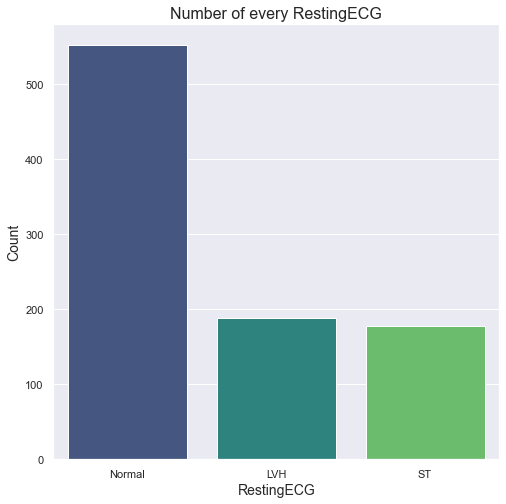

In [16]:
plt.figure(figsize=(8, 8))
sns.barplot(x='index', y='RestingECG', data=RestingECG, palette='viridis')
plt.xlabel('RestingECG', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of every RestingECG', fontsize=16)
plt.show()

In [17]:
ST_Slope = df['ST_Slope'].value_counts().reset_index()
ST_Slope

,index,ST_Slope
0,Flat,460
1,Up,395
2,Down,63


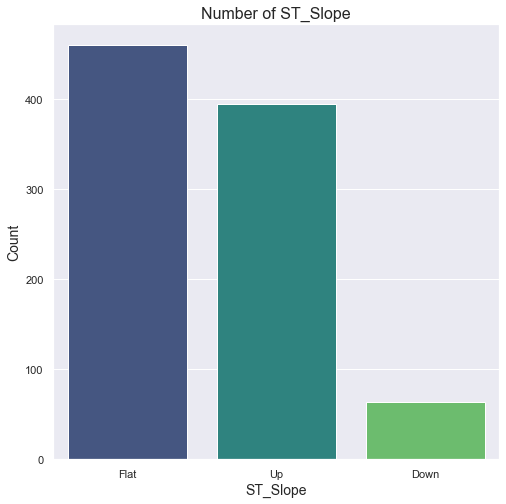

In [18]:
plt.figure(figsize=(8, 8))
sns.barplot(x='index', y='ST_Slope', data=ST_Slope, palette='viridis')
plt.xlabel('ST_Slope', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of ST_Slope', fontsize=16)
plt.show()

In [19]:
HeartDisease = df['HeartDisease'].value_counts().reset_index()
HeartDisease

,index,HeartDisease
0,1,508
1,0,410


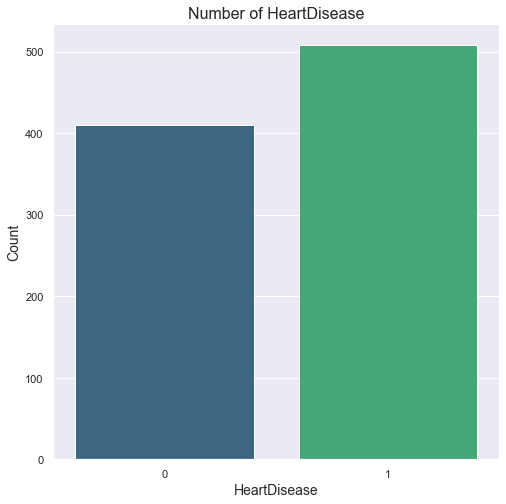

In [20]:
plt.figure(figsize=(8, 8))
sns.barplot(x='index', y='HeartDisease', data=HeartDisease, palette='viridis')
plt.xlabel('HeartDisease', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of HeartDisease', fontsize=16)
plt.show()

In [21]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


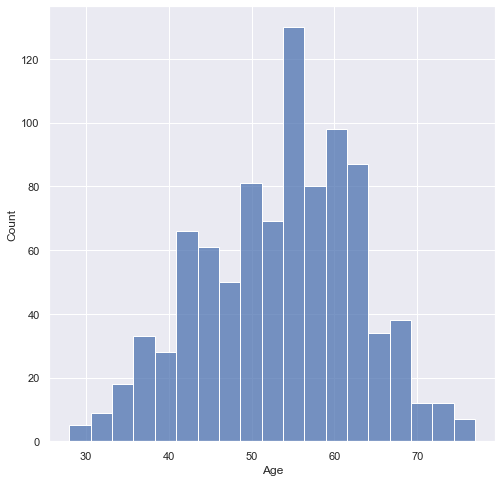

In [22]:
plt.figure(figsize=(8,8))
sns.histplot(df['Age'])
plt.show()

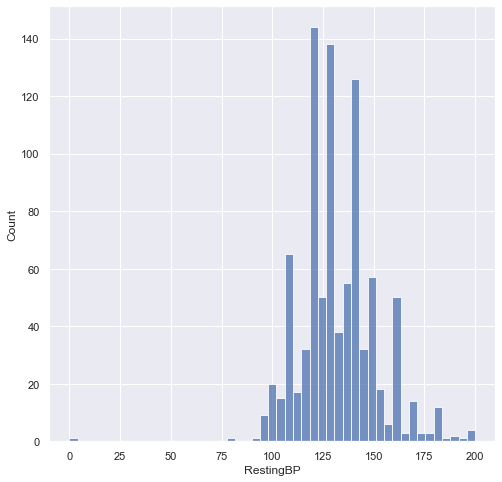

In [23]:
plt.figure(figsize=(8,8))
sns.histplot(df['RestingBP'])
plt.show()

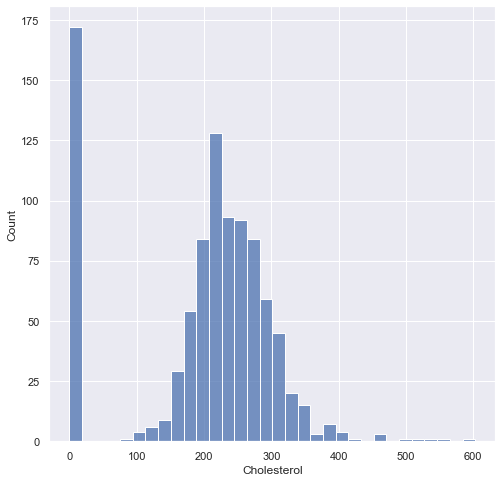

In [24]:
plt.figure(figsize = (8,8))
sns.histplot(df['Cholesterol'])
plt.show()

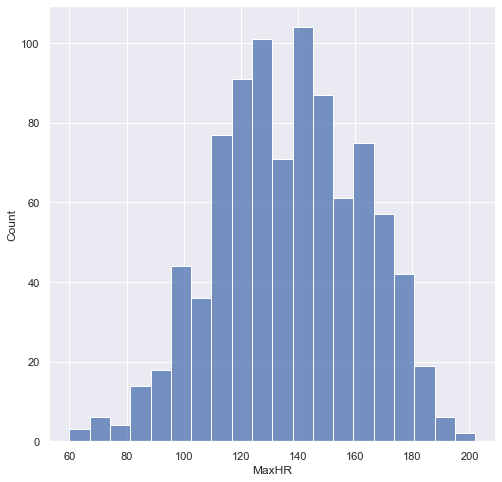

In [25]:
plt.figure(figsize = (8,8))
sns.histplot(df['MaxHR'])
plt.show()

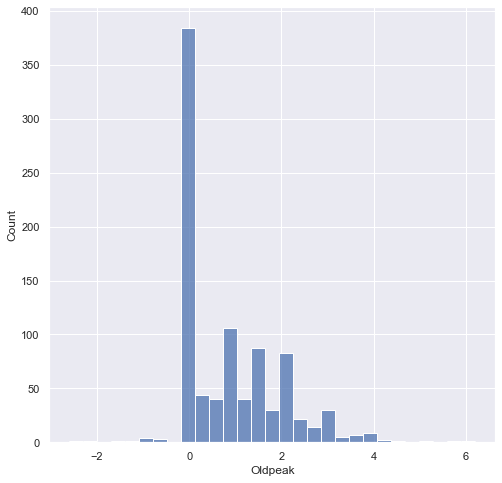

In [26]:
plt.figure(figsize = (8,8))
sns.histplot(df['Oldpeak'])
plt.show()

In [27]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [28]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


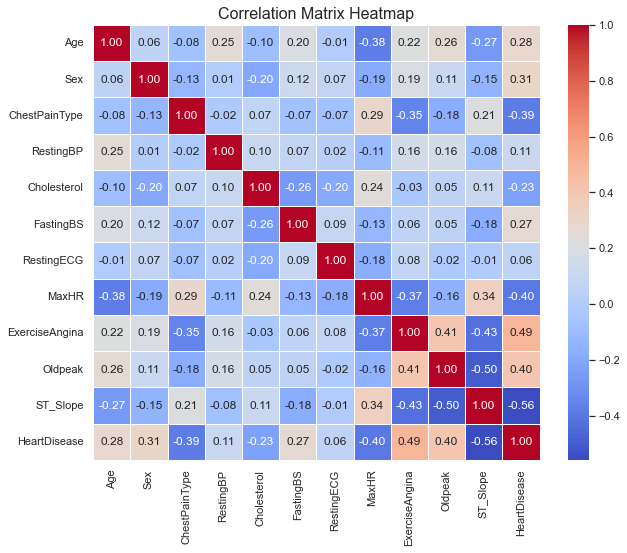

In [29]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.show()

In [30]:
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


# Train Test Splitting

In [31]:
X=df.drop(['HeartDisease'],axis=1)

In [32]:
Y=df['HeartDisease']

In [33]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [34]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [65]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [66]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,1,2,120,240,1,1,194,0,0.8,0
25,36,1,2,130,209,0,1,178,0,0.0,2
84,56,1,0,150,213,1,1,125,1,1.0,1
10,37,0,2,130,211,0,1,142,0,0.0,2
344,51,1,0,120,0,1,1,104,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,48,0,0,120,254,0,2,110,0,0.0,2
270,45,1,0,120,225,0,1,140,0,0.0,2
860,60,1,0,130,253,0,1,144,1,1.4,2
435,60,1,0,152,0,0,2,118,1,0.0,2


In [67]:
x_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
668,63,0,1,140,195,0,1,179,0,0.0,2
30,53,1,2,145,518,0,1,130,0,0.0,1
377,65,1,0,160,0,1,2,122,0,1.2,1
535,56,1,0,130,0,0,0,122,1,1.0,1
807,54,1,1,108,309,0,1,156,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
211,50,0,2,140,288,0,1,140,1,0.0,1
745,63,0,0,108,269,0,1,169,1,1.8,1
584,64,1,0,141,244,1,2,116,1,1.5,1
878,49,1,1,130,266,0,1,171,0,0.6,2


In [68]:
Y_train

795    0
25     0
84     1
10     0
344    1
      ..
106    0
270    0
860    1
435    0
102    1
Name: HeartDisease, Length: 734, dtype: int64

In [69]:
y_test

668    0
30     1
377    1
535    1
807    0
      ..
211    1
745    1
584    1
878    0
451    1
Name: HeartDisease, Length: 184, dtype: int64

# RandomForest Classifier

In [70]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [71]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(x_test)

In [72]:
rf_classifier.fit(X_train_scaled, Y_train)

RandomForestClassifier(random_state=42)

In [73]:
rf_classifier.score(X_train, Y_train)

0.670299727520436

In [74]:
y_pred = rf_classifier.predict(X_test_scaled)

In [75]:
accuracy = accuracy_score(y_test, y_pred)


In [77]:
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")

Random Forest Classifier Accuracy: 0.89


# GradientBosstingClassifier

In [78]:
gb_clf = GradientBoostingClassifier(random_state=42)

In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(x_test)

In [80]:
gb_clf.fit(X_train_scaled, Y_train)

GradientBoostingClassifier(random_state=42)

In [81]:
gb_clf.score(X_train_scaled, Y_train)

0.94141689373297

In [82]:
y_pred = gb_clf.predict(X_test_scaled)

In [83]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Classifier Accuracy: {accuracy:.2f}")

Gradient Boosting Classifier Accuracy: 0.87


# Support Vector Machine

In [84]:
svm_clf = SVC(kernel='rbf', random_state=42) 

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(x_test)


In [86]:
svm_clf.fit(X_train_scaled, Y_train)

SVC(random_state=42)

In [87]:
svm_clf.score(X_train_scaled, Y_train)

0.8991825613079019

In [57]:
y_pred = svm_clf.predict(X_test_scaled)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")

SVM Accuracy: 0.89


# LogisticRegression

In [59]:
lreg = LogisticRegression(random_state=42)

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(x_test)

In [61]:
lreg.fit(X_train_scaled, Y_train)

LogisticRegression(random_state=42)

In [62]:
lreg.score(X_train_scaled, Y_train)

0.8535825545171339

In [63]:
y_pred=lreg.predict(X_test_scaled)

In [64]:
accuracy=accuracy_score(y_test,y_pred)
print(f'Logistic Regression Accuracy: {accuracy: .2f}')

Logistic Regression Accuracy:  0.86
